<a href="https://colab.research.google.com/github/mari952/CSE445_ML/blob/main/Data_Processing%2C_training%2C_validation_and_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Imports***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

***Remove COlumns***

In [ ]:
# Drop irrelevant columns

df = pd.read_csv('/content/miami-housing.csv')

red_columns = ['LATITUDE', 'LONGITUDE','PARCELNO','avno60plus']

df = df.drop(columns=red_columns)

print(df.columns)


Index(['SALE_PRC', 'LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST',
       'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST',
       'age', 'month_sold', 'structure_quality'],
      dtype='object')


***Feature Selection***

In [ ]:
# Seperating Input Variables = X and Output Variables = Y
X = df.drop('SALE_PRC', axis=1)
y = df['SALE_PRC']

# SelectKBest with f_regression score function, selecting top 8 attributes
selector = SelectKBest(score_func=f_regression, k=8)
X_selected = selector.fit_transform(X, y)

# selected feature indices
selected_indices = selector.get_support(indices=True)

# selected feature names
selected_features = X.columns[selected_indices]

# Print the selected feature names
print("Selected feature names:")
for feature in selected_features:
    print(feature)


Selected feature names:
LND_SQFOOT
TOT_LVG_AREA
SPEC_FEAT_VAL
OCEAN_DIST
CNTR_DIST
SUBCNTR_DI
HWY_DIST
structure_quality


***Scaling and Splitting Data***

In [ ]:
#  MinMaxScaler (Normalization)
scaler = MinMaxScaler()

# Split the data into training and temporary data, 70:30
X_train, X_rest, y_train, y_rest = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Split the rest of data into validation and test sets, 15:15
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Check for correct split
# the number of rows for each set, should be 9752:2090:2090
train_rows = X_train.shape[0]
val_rows = X_val.shape[0]
test_rows = X_test.shape[0]

# Printing the no of data in each dataset
print("Training set data:", train_rows)
print("Validation set data:", val_rows)
print("Test set rows:", test_rows)

Training set data: 9752
Validation set data: 2090
Test set rows: 2090


***Model 1: Linear Regression training and Validation***

            Features   Coefficient
0         LND_SQFOOT  4.835275e+04
1       TOT_LVG_AREA  1.180851e+06
2      SPEC_FEAT_VAL  5.401304e+05
3         OCEAN_DIST -3.328245e+05
4          CNTR_DIST -3.449798e+05
5         SUBCNTR_DI  2.877059e+04
6           HWY_DIST  1.788269e+05
7  structure_quality  2.638795e+05

Evaluation Metrics Score:
Mean Absolute Error: 123054.4336922302
Mean Squared Error: 35342222197.336494
Root Mean Squared Error: 187995.27174196826
R-squared: 0.6665547603270073




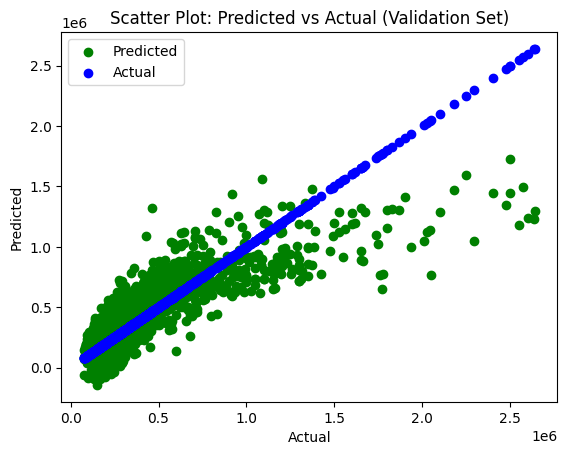

In [ ]:
# Initialize and fit training dataset to train
model1 = LinearRegression()
model1.fit(X_train_scaled, y_train)

# Get the coefficients
coefficients = model1.coef_

#feature names
feature_names = ['LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'OCEAN_DIST','CNTR_DIST','SUBCNTR_DI','HWY_DIST','structure_quality']

# Create a DataFrame to display the coefficients with column names
coefficients_df = pd.DataFrame({'Features':feature_names,'Coefficient': coefficients})

print(coefficients_df)

# Predict the sale prices for the validation set
y_val_pred = model1.predict(X_val_scaled)

#Evaluation scores on different metrics on cross validation set
mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
rmse = mean_squared_error(y_val, y_val_pred, squared=False)
r2 = r2_score(y_val, y_val_pred)

print("\nEvaluation Metrics Score:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("\n")

# Scatter plot for actual sale price vs predicted sale price
plt.scatter(y_val, y_val_pred, color='green', label='Predicted')
plt.scatter(y_val, y_val, color='blue', label='Actual')

#plot labels and title
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Scatter Plot: Predicted vs Actual (Validation Set)')

plt.legend()
plt.show()

***Model 1: Linear Regression on Test data***

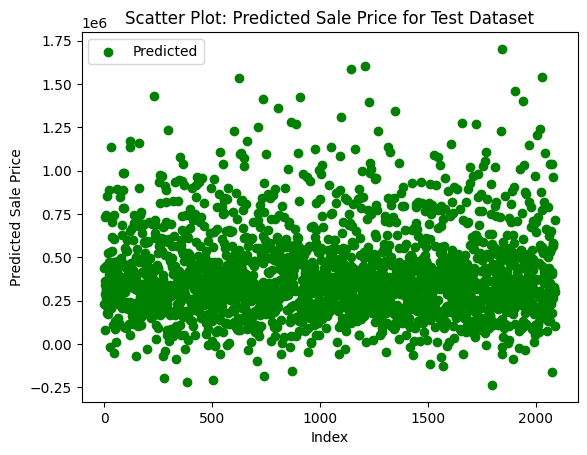

In [ ]:
# predictiing sale prices of test dataset
y_test_pred = model1.predict(X_test_scaled)

#Line plot for visualization
plt.scatter(range(len(y_test_pred)), y_test_pred, color='green', label='Predicted')

# labels and title
plt.xlabel('Index')
plt.ylabel('Predicted Sale Price')
plt.title('Scatter Plot: Predicted Sale Price for Test Dataset')

plt.legend()
plt.show()

***Model 2: Random Forest Regressor Training and Validation***

            Features  Importance Score
0         LND_SQFOOT          0.032708
1       TOT_LVG_AREA          0.442840
2      SPEC_FEAT_VAL          0.030873
3         OCEAN_DIST          0.170243
4          CNTR_DIST          0.158624
5         SUBCNTR_DI          0.054068
6           HWY_DIST          0.022982
7  structure_quality          0.087661

Evaluation Metrics Score:
Mean Absolute Error: 54326.0698812182
Mean Squared Error: 11549076918.200644
R-squared: 0.8910372783157516




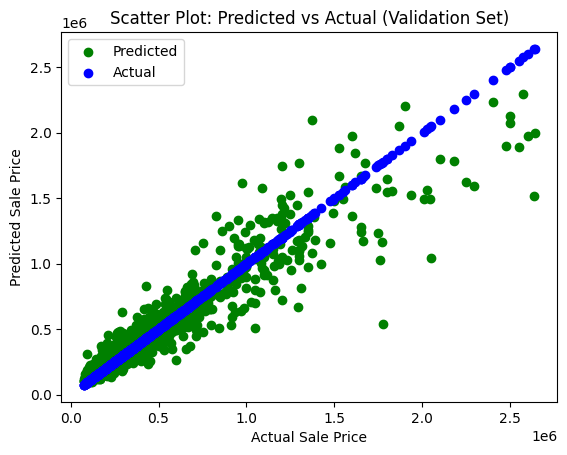

In [ ]:
# Initialize and fit training dataset to train
model2 = RandomForestRegressor()
model2.fit(X_train_scaled, y_train)

#Feature importances
feature_names = ['LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'OCEAN_DIST','CNTR_DIST','SUBCNTR_DI','HWY_DIST','structure_quality']
feature_Score = model2.feature_importances_

# Create a DataFrame to display the coefficients with column names
Attribute_rank = pd.DataFrame({'Features':feature_names,'Importance Score': feature_Score})

print(Attribute_rank)

# Predict the sale prices for the validation set
y_val_pred = model2.predict(X_val_scaled)

#Evaluation scores on different metrics on cross validation set
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print("\nEvaluation Metrics Score:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("\n")

# Scatter plot for actual sale price vs predicted sale price
plt.scatter(y_val, y_val_pred, color='green', label='Predicted')
plt.scatter(y_val, y_val, color='blue', label='Actual')

#plot labels and title
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Scatter Plot: Predicted vs Actual (Validation Set)')

plt.legend()
plt.show()

***Model 2: Random Forest Regressor on Test data***

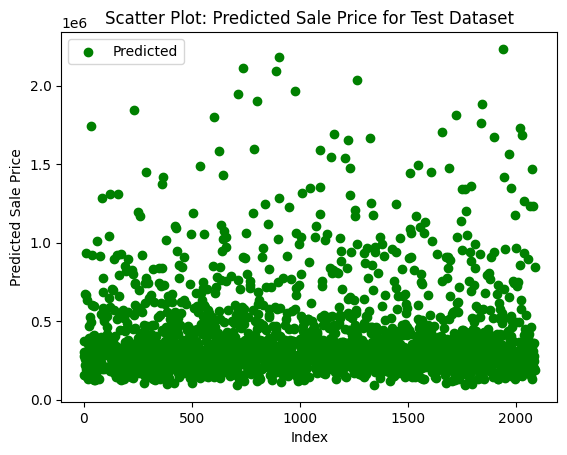

In [ ]:
# predictiing sale prices of test dataset
y_test_pred = model2.predict(X_test_scaled)

#Line plot for visualization
plt.scatter(range(len(y_test_pred)), y_test_pred, color='green', label='Predicted')

# labels and title
plt.xlabel('Index')
plt.ylabel('Predicted Sale Price')
plt.title('Scatter Plot: Predicted Sale Price for Test Dataset')

plt.legend()
plt.show()